# Estimación por mínimos cuadrados
_Nicolás Villegas Vargas, María Camila Vásquez Correa_

Modelación Experimental, 2019-1

### ARMA: Datos artificiales

In [6]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(12345)
import matplotlib.pyplot as plt
%matplotlib inline

Generamos datos con los siguientes parámetros

In [8]:
arparams = np.array([1, -.75, +.25])
maparams = np.array([1, .65, .35])
nobs = 250

In [21]:
y = arma_generate_sample(arparams, maparams, nobs)

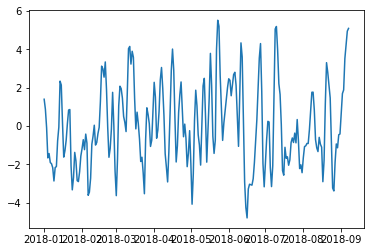

In [24]:
plt.plot(y)
plt.show()

In [23]:
dates = pd.date_range(start='1/1/2018', periods=nobs)
y = pd.Series(y, index=dates)

In [25]:
arma_mod = sm.tsa.ARMA(y, order=(2,2))
arma_res = arma_mod.fit(trend='nc', disp=-1)

In [26]:
print(arma_res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  250
Model:                     ARMA(2, 2)   Log Likelihood                -362.164
Method:                       css-mle   S.D. of innovations              1.026
Date:                Sun, 05 May 2019   AIC                            734.328
Time:                        00:07:06   BIC                            751.935
Sample:                    01-01-2018   HQIC                           741.414
                         - 09-07-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.7386      0.170      4.341      0.000       0.405       1.072
ar.L2.y       -0.2647      0.129     -2.045      0.042      -0.518      -0.011
ma.L1.y        0.6536      0.168      3.897      0.0

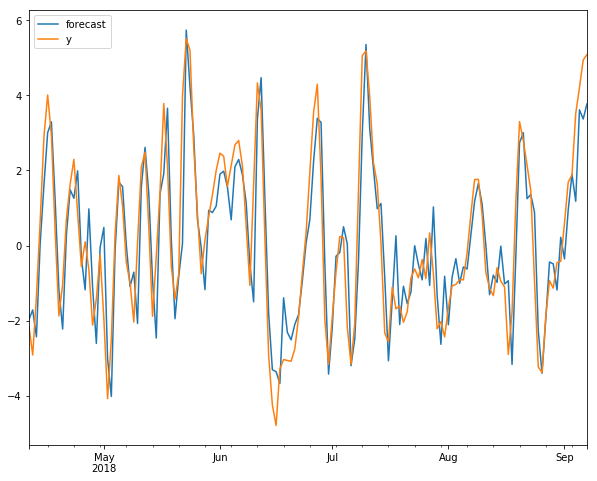

In [29]:
fig, ax = plt.subplots(figsize=(10,8))
fig = arma_res.plot_predict(start=dates[100], end=dates[-1], ax=ax)
legend = ax.legend(loc='upper left')

### Ordinary Least Squares

In [31]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [32]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [36]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01],
       [1.00000000e+00, 9.09090909e-01, 8.26446281e-01],
       [1.00000000e+00, 1.01010101e+00, 1.02030405e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00],
       [1.00000000e+00, 1.21212121e+00, 1.46923783e+00],
       [1.00000000e+00, 1.31313131e+00, 1.72431385e+00],
       [1.00000000e+00, 1.41414141e+00, 1.99979594e+00],
       [1.00000000e+00, 1.51515152e+00, 2.29568411e+00],
       [1.00000000e+00, 1.61616162e+00, 2.61197837e+00],
       [1.00000000e+00, 1.71717